In [33]:
import numpy as np
import pandas as pd

In [34]:
bmi = pd.read_csv("C:\\Users\\SHRISTI\\Desktop\\Machine Learning\\IISc\\Data Sets\\BMI data.csv")
bmi

#(r"C:\\Users\\SHRISTI\\Desktop\\Machine Learning\\IISc\\Data Sets\\BMI data.csv")     r is used as file seperater for any OS

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [35]:
bmi.shape

(500, 4)

In [36]:
bmi.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [37]:
bmi.sample(10)            # sample gives random printing

,Gender,Height,Weight,Index
80,Male,164,75,3
237,Male,165,155,5
377,Male,178,142,5
387,Female,160,83,4
422,Female,186,146,5
181,Male,177,117,4
274,Male,178,83,3
307,Male,144,88,5
395,Female,164,71,3
311,Female,180,156,5


In [38]:
bmi.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [39]:
bmi.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


In [40]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Gender    500 non-null object
Height    500 non-null int64
Weight    500 non-null int64
Index     500 non-null int64
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [41]:
bmi["Gender"].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns

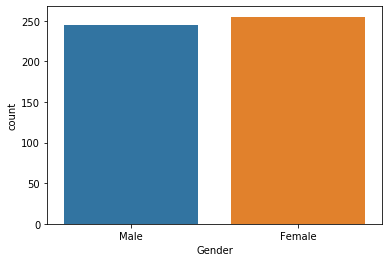

In [43]:
sns.countplot("Gender",data=bmi)
plt.show()

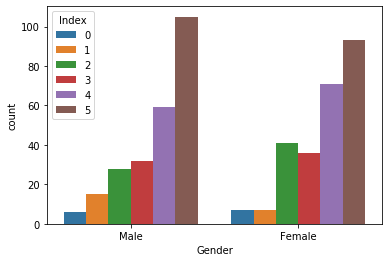

In [44]:
sns.countplot("Gender",data=bmi,hue="Index")
plt.show()

Extraction can be done in three ways - keyname, using loc, and using iloc

In [45]:
bmi.iloc[::-1,:]                                #loc is used when datatype is string

,Gender,Height,Weight,Index
499,Male,173,131,5
498,Male,150,95,5
497,Female,141,136,5
496,Female,184,121,4
495,Female,150,153,5
...,...,...,...,...
4,Male,149,61,3
3,Female,195,104,3
2,Female,185,110,4
1,Male,189,87,2


#### Data seperation

In [46]:
X_ghw = bmi.iloc[:,0:3]
y_index = bmi.iloc[:,3]

In [47]:
print("Type of X_ghw is", type(X_ghw))
print("Type of y_index is", type(y_index))

Type of X_ghw is <class 'pandas.core.frame.DataFrame'>
Type of y_index is <class 'pandas.core.series.Series'>


#### Encoding (Binary) 
male:0,female:1

In [48]:
X_ghw["Gender"] = X_ghw.Gender.map({"Male":0,"Female":1})
X_ghw

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61
...,...,...,...
495,1,150,153
496,1,184,121
497,1,141,136
498,0,150,95


#### Converting into numpy array

In [49]:
XA = X_ghw.values
YA = y_index.values

In [50]:
print("Type of XA is", type(XA))
print("Type of YA is", type(YA))

Type of XA is <class 'numpy.ndarray'>
Type of YA is <class 'numpy.ndarray'>


#### Splitting the data into train and test model

In [51]:
n = int(len(bmi)*0.7)
n

350

In [52]:
X_train = XA[:n]
X_test = XA[n:]
y_train = YA[:n]
y_test = YA[n:]

In [53]:
print("size of X_train", X_train.shape)
print("size of Y_train", y_train.shape)

size of X_train (350, 3)
size of Y_train (350,)


In [54]:
from sklearn.neighbors import KNeighborsClassifier

trainer = KNeighborsClassifier(n_neighbors = 5)
learner = trainer.fit(X_train,y_train)

In [55]:
Index_name = pd.Series(["Extremely Weak", "Weak", "Normal", "Overweight", "Obesity","Extreme Obesity"])


In [65]:
i = learner.predict([[1,150,47]])
Index_name[i]

2    Normal
dtype: object

##### Testing

In [57]:
Yact = y_test
Ypre = learner.predict(X_test)

In [58]:
Yalist = list(Yact)
Yplist = list(Ypre)

In [59]:
table = pd.DataFrame({"Ya": Yalist, "Yp":Yplist})
table

,Ya,Yp
0,2,3
1,2,2
2,2,2
3,5,5
4,0,0
...,...,...
145,5,5
146,4,4
147,5,5
148,5,5


In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(Yplist,Yact)*100

91.33333333333333

In [62]:
n_value = list(range(1,23))
n_value

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [63]:
acc_list=[]
for k in n_value: 
    mytrainer = KNeighborsClassifier(n_neighbors = k)
    mylearner = mytrainer.fit(X_train, y_train)
    Yactual = y_test
    Ypredict = mylearner.predict(X_test)
    accuracy = accuracy_score(Yactual, Ypredict)
    acc_list.append(accuracy)
    #print(k)

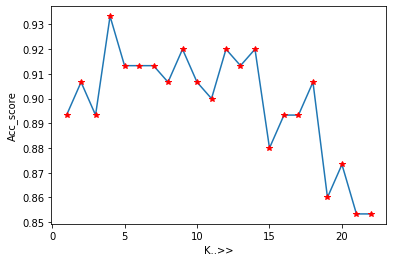

In [64]:
from matplotlib import pyplot as plt

plt.plot(n_value,acc_list)
plt.plot(n_value,acc_list,'r*')
plt.xlabel("K..>>")
plt.ylabel("Acc_score")
plt.show()